grade: 5/5 great work!

# Problem Statement
For this homework, we create an interactive notebook where we investigate data from all four spreadsheets within the Pronto dataset. We practice operations in Pandas and use ipywidgets to generate interactive plots.

**Statement of Problem Being Investigated**:
For this assignment, we will investigate various properties of the dataset over time. Namely, we will focus on how the average number of bikes available at each station changes temporally (over years, months, days, and hours). Additionally, we will investigate daily ridership trends and compare these trends across user types (i.e., Annual Member and Short-Term Pass Holder), as well as under different weather conditions. Though these topics may at first appear to be seemingly unrelated other than the fact that they both consist of some sort of temporal analysis of the data, they show the data may be useful to different groups of people. The ability to look at historical data of average number of bikes available at a given station each hour may be of interest to Annual Members who want to find what station(s) give them the best chances of securing a bike within some distance of them. The ability to interactively analyze daily ridership counts over time by user type and weather status (e.g., on rainy days) can help Pronto staff better understand when peak (and off-peak) periods of use are which can help them with planning applications (e.g., when it may be useful to provide more bikes for rental).

## Two Questions to be Investigated:

### Question 1: How does the average hourly number of bikes available change over time when considering all stations?

### Question 2: What types of trends can be observed when considering daily ridership over time, with additional consideration given to user type and weather condition? 


Since we will be working with our data primarily via Pandas, we first import the pandas module. We will also import wget to download the data from a url and zipfile so we can read the csv files from within the zipped package from Pronto.

In [1]:
import pandas as pd
import zipfile
import wget

# download the data
wget.download('https://s3.amazonaws.com/pronto-data/open_data_year_one.zip')

zf = zipfile.ZipFile('open_data_year_one.zip')

100% [....................................................] 74281286 / 74281286

## Loading Data and Initial Exploration
We first load the following four datasets within the Pronot dataset and set a time-related variable as the index column of the dataframe when applicable:
* Trips (contains data on trip origin, destination, duration, rider demographic data etc.)
* Weather (contains data on temperature, humidity, precipication etc.)
* Stations (contains location info on the Pronto stations)
* Status (contains data on number of bikes available at each station at various points in time)

As was used in the previous homework, we use the automatic date parsing feature from pandas to properly format dates in all instances. In each case, we examine the first few rows of the dataframe to confirm things were loaded properly.

### Load the Trips Data

In [2]:
fileHandleTrips = zf.open('2015_trip_data.csv')
trips = pd.read_csv(fileHandleTrips,parse_dates=['starttime','stoptime'])
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971


### Load the Weather Data

In [3]:
fileHandleWeather = zf.open('2015_weather_data.csv')
weather = pd.read_csv(fileHandleWeather,parse_dates=['Date'],index_col=['Date'])
weather.head()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
Date,,,,,,,,,,,,,,,,,,,,
2014-10-13,71,62,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.00,Rain
2014-10-14,63,59,55,52,51,50,88,78,63,29.84,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2014-10-15,62,58,54,53,50,46,87,77,67,29.98,29.71,29.51,10,9,3,18,7,25,0.45,Rain
2014-10-16,71,61,52,49,46,42,83,61,36,30.03,29.95,29.81,10,10,10,9,4,-,0.00,Rain
2014-10-17,64,60,57,55,51,41,87,72,46,29.83,29.78,29.73,10,10,6,8,3,-,0.14,Rain


### Load the Stations Data

In [4]:
fileHandleStations = zf.open('2015_station_data.csv')
stations = pd.read_csv(fileHandleStations,parse_dates=['online'],index_col=['online'])
stations.head()

,id,name,terminal,lat,long,dockcount
online,,,,,,
2014-10-13,1,3rd Ave & Broad St,BT-01,47.618418,-122.350964,18
2014-10-13,2,2nd Ave & Vine St,BT-03,47.615829,-122.348564,16
2014-10-13,3,6th Ave & Blanchard St,BT-04,47.616094,-122.341102,16
2014-10-13,4,2nd Ave & Blanchard St,BT-05,47.613110,-122.344208,14
2014-10-13,5,2nd Ave & Pine St,CBD-13,47.610185,-122.339641,18


#### Note on Manner of Station Identification/Reference:
From the above Stations data, we can see that stations are referenced by both a name and ID. Since the name is a more intuitive representation for a human-user, but the ID is more applicable for consideration in the analysis context as it can be used to link this data to the Status data, we investigate combining the two columns into a dictionary.

In [5]:
# combine name and id cols of stations dataframe into a dictionary
stations.set_index('name')['id'].to_dict()

{'12th Ave & E Denny Way': 14,
 '12th Ave & E Mercer St': 19,
 '12th Ave & E Yesler Way': 60,
 '12th Ave & NE Campus Pkwy': 40,
 '15th Ave E & E Thomas St': 13,
 '15th Ave NE & NE 40th St': 44,
 '1st Ave & Marion St': 50,
 '2nd Ave & Blanchard St': 4,
 '2nd Ave & Pine St': 5,
 '2nd Ave & Spring St': 9,
 '2nd Ave & Vine St': 2,
 '3rd Ave & Broad St': 1,
 '6th Ave & Blanchard St': 3,
 '6th Ave S & S King St': 27,
 '7th Ave & Union St': 6,
 '9th Ave N & Mercer St': 20,
 'Bellevue Ave & E Pine St': 18,
 'Burke Museum / E Stevens Way NE & Memorial Way NE': 43,
 'Burke-Gilman Trail / NE Blakeley St & 24th Ave NE': 38,
 'Cal Anderson Park / 11th Ave & Pine St': 16,
 "Children's Hospital / Sandpoint Way NE & 40th Ave NE": 21,
 'City Hall / 4th Ave & James St': 7,
 'Dexter Ave & Denny Way': 36,
 'Dexter Ave N & Aloha St': 31,
 'E Blaine St & Fairview Ave E': 23,
 'E Harrison St & Broadway Ave E': 11,
 'E Pine St & 16th Ave': 15,
 'Eastlake Ave E & E Allison St': 24,
 'Fred Hutchinson Cancer Res

### Load the Status Data

In [6]:
fileHandleStatus = zf.open('2015_status_data.csv')
status = pd.read_csv(fileHandleStatus,parse_dates=['time'],index_col=['time'])
status.head()

,station_id,bikes_available,docks_available,bikes_blocked,docks_blocked
time,,,,,
2014-10-15 08:29:47,1,0,16,2,0
2014-10-15 08:29:47,2,4,12,0,0
2014-10-15 08:29:47,3,7,8,1,0
2014-10-15 08:29:47,4,3,11,0,0
2014-10-15 08:29:47,5,7,10,1,0


## Investigation of Question 1
### Average Bikes Available per Hour by Station (2014)

<function __main__.plotBikesAvail>

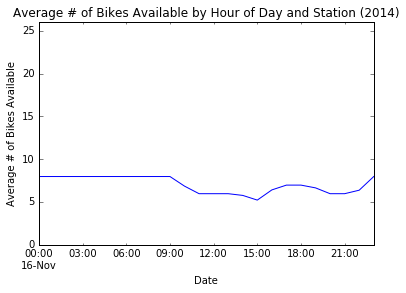

In [7]:
%matplotlib inline
from ipywidgets import interact
import numpy as np

'''
Creates a plot of the average number of bikes available per hour at a given station
Users are able to specify dates and station
'''
def plotBikesAvail(station,startMonth,startDay,endMonth,endDay):
    # select a subset of the status dataset that only has records for the selected station
    statusSubset = status.loc[status['station_id']==station]
    
    # create a time series for the number of bikes available
    tsStation = pd.Series(statusSubset['bikes_available'])
    # resample the time series by hour and compute the mean for each hour
    meanBikesAvail = tsStation.resample('H',how='mean')
    
    # create strings for the dates
    startDate = '2014' + '-' + str(startMonth) + '-' + str(startDay)
    endDate = '2014' + '-' + str(endMonth) + '-' + str(endDay)
    
    # generate the plot and specify some formatting attributes
    bikePlot = meanBikesAvail[startDate:endDate].plot()
    bikePlot.set_xlabel('Date')
    bikePlot.set_ylabel('Average # of Bikes Available')
    bikePlot.set_title('Average # of Bikes Available by Hour of Day and Station (2014)')
    bikePlot.set_ylim(0, np.max(status['bikes_available']))
    

#### determine the valid months for the 2014 plot
# first, resample the 2014 status data only
months2014 = status.loc[status.index.year==2014]
# get the unique months for which data are available
months2014 = np.unique(months2014.index.month)
# get the min and max values for the tuple
minMonth = int(np.min(months2014))
maxMonth = int(np.max(months2014))
# create the tuple that will allow valid month selection on a slider control
monthRange2014 = (minMonth,maxMonth)

# specify TYPICAL days of month
daysOfMonth = (1,31)

# create an interactive plot
interact(plotBikesAvail,station=stations.set_index('name')['id'].to_dict(),
         startMonth=monthRange2014,startDay=daysOfMonth,endMonth=monthRange2014,endDay=daysOfMonth)

### Average Bikes Available per Hour by Station (2015)

<function __main__.plotBikesAvail>

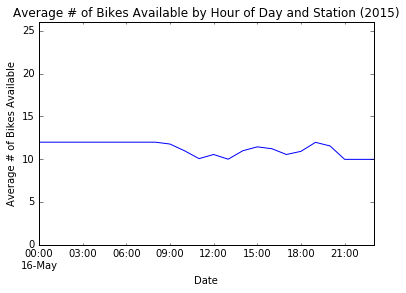

In [8]:
%matplotlib inline
from ipywidgets import interact
import numpy as np

'''
Creates a plot of the average number of bikes available per hour at a given station
Users are able to specify dates and station
'''
def plotBikesAvail(station,startMonth,startDay,endMonth,endDay):
    # select a subset of the status dataset that only has records for the selected station
    statusSubset = status.loc[status['station_id']==station]
    
    # create a time series for the number of bikes available
    tsStation = pd.Series(statusSubset['bikes_available'])
    # resample the time series by hour and compute the mean for each hour
    meanBikesAvail = tsStation.resample('H',how='mean')
    
    # create strings for the dates
    startDate = '2015' + '-' + str(startMonth) + '-' + str(startDay)
    endDate = '2015' + '-' + str(endMonth) + '-' + str(endDay)
    
    # generate the plot and specify some formatting attributes
    bikePlot = meanBikesAvail[startDate:endDate].plot()
    bikePlot.set_xlabel('Date')
    bikePlot.set_ylabel('Average # of Bikes Available')
    bikePlot.set_title('Average # of Bikes Available by Hour of Day and Station (2015)')
    bikePlot.set_ylim(0, np.max(status['bikes_available']))
    

#### determine the valid months for the 2015 plot
# first, resample the 2014 status data only
months2015 = status.loc[status.index.year==2015]
# get the unique months for which data are available
months2015 = np.unique(months2015.index.month)
# get the min and max values for the tuple
minMonth = int(np.min(months2015))
maxMonth = int(np.max(months2015))
# create the tuple that will allow valid month selection on a slider control
monthRange2015 = (minMonth,maxMonth)

# specify TYPICAL days of month
daysOfMonth = (1,31)

# create an interactive plot
interact(plotBikesAvail,station=stations.set_index('name')['id'].to_dict(),
         startMonth=monthRange2015,startDay=daysOfMonth,endMonth=monthRange2015,endDay=daysOfMonth)

### Comments on Question 1 Plots
When exploring the above plots, the average number of bikes available for rental per hour depends a lot on the station considered. At some stations, the number remains nearly constant throughout the day. Further, while behavior for a given day at a given station may appear constant, consideration of a larger time period (i.e., days, months etc.) often shows larger fluctuations. Finally, we note that for these plots, it would have been ideal to have a single plot that allowed selection of both the 2014 and 2015 years for the dates; that said, since the range of months for which data are available for each year is not the same, this behavior was avoided for now.

## Data Preparation for Question 2
We will need access to various subsets of the aforementioned data for the question 2 analyses. We discuss these data in the following.

### Create a Subset of the Weather Data
Here, we create a subset of the weather data that only contains information on precipication and excludes other information not relevant for our analyses, such as temperature.

In [9]:
precipSubset = weather[['Precipitation_In ','Events']]

### Create Subsets of the Trips Dataset Based on User Type
Here, we create subsets of the Trips data based on User Type. Hence, we have two subsets: one for **Annual Members** and one for **Short-Term Pass Holders**

In [10]:
# create subsets of trips for annual members
annualMemTrips = trips.loc[trips['usertype']=='Annual Member']
annualMemTrips = annualMemTrips.set_index(['starttime'])
annualMemTrips.head()

,trip_id,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
starttime,,,,,,,,,,,
2014-10-13 10:31:00,431,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960
2014-10-13 10:32:00,432,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970
2014-10-13 10:33:00,433,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988
2014-10-13 10:34:00,434,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977
2014-10-13 10:34:00,435,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971


In [11]:
# create subsets of trips for short-term pass holders
stPassHolderTrips = trips.loc[trips['usertype']=='Short-Term Pass Holder']
stPassHolderTrips = stPassHolderTrips.set_index(['starttime'])
stPassHolderTrips.head()

,trip_id,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
starttime,,,,,,,,,,,
2014-10-13 12:11:00,507,2014-10-13 12:16:00,SEA00321,332.457,City Hall / 4th Ave & James St,City Hall / 4th Ave & James St,CBD-07,CBD-07,Short-Term Pass Holder,NaN,NaN
2014-10-13 12:20:00,518,2014-10-13 12:31:00,SEA00321,690.793,City Hall / 4th Ave & James St,2nd Ave & Blanchard St,CBD-07,BT-05,Short-Term Pass Holder,NaN,NaN
2014-10-13 12:43:00,530,2014-10-13 12:48:00,SEA00311,278.849,King Street Station Plaza / 2nd Ave Extension ...,King Street Station Plaza / 2nd Ave Extension ...,PS-05,PS-05,Short-Term Pass Holder,NaN,NaN
2014-10-13 12:48:00,533,2014-10-13 12:51:00,SEA00269,179.939,NE 42nd St & University Way NE,12th Ave & NE Campus Pkwy,UD-02,UD-04,Short-Term Pass Holder,NaN,NaN
2014-10-13 12:48:00,534,2014-10-13 12:58:00,SEA00355,590.698,9th Ave N & Mercer St,Dexter Ave & Denny Way,DPD-01,SLU-18,Short-Term Pass Holder,NaN,NaN


### Create Time Series of Daily Ridership by User Type and Weather Condition
Using the subsets of the Trips data from above, we create time series that we re-sample with a period of 24 hours to compute daily ridership. For each User Type (i.e., **Annual Member** and **Short-Term Pass Holder**), we create three time series as follows:
1. Daily ridership regardless of weather
2. Daily ridership on days with rain
3. Daily ridership on days without rain

#### Create the Time Series of Daily Ridership for the Annual Members

In [12]:
# ALL days regardless of weather
# we just want to count riders so it doesn't really matter what column we take
tsDailyAnnMemRidership = pd.Series(annualMemTrips['trip_id'])
# resample the time series by day and compute the count for each day
tsDailyAnnMemRidership = tsDailyAnnMemRidership.resample('24h',how='count')
#tsDailyAnnMemRidership.head()

# get the rider counts on rainy days only
annMemWeather = precipSubset.join(tsDailyAnnMemRidership)
annMemRain = annMemWeather.loc[annMemWeather['Events']=='Rain']
tsDailyAnnMemRidershipRain = pd.Series(annMemRain['trip_id'])
# tsDailyAnnMemRidershipRain.head()

# get the counts on non-rainy-days only
annMemNoRain = annMemWeather.loc[annMemWeather['Events']!='Rain']
tsDailyAnnMemRidershipNoRain = pd.Series(annMemNoRain['trip_id'])
tsDailyAnnMemRidershipNoRain.head()

Date
2014-10-19    239
2014-11-01    161
2014-11-07    252
2014-11-08    207
2014-11-10    254
Name: trip_id, dtype: float64

#### Create the Time Series of Daily Ridership for the Short-Term Pass Holders

In [13]:
# ALL days regardless of weather
# again, we just want to count riders so it doesn't really matter what column we take
tsSTPassHolderRidership = pd.Series(stPassHolderTrips['trip_id'])
# resample the time series by day and compute the count for each day
tsSTPassHolderRidership = tsSTPassHolderRidership.resample('24h',how='count')
tsSTPassHolderRidership.head()

# get the rider counts on rainy days only
stPassHolderWeather = precipSubset.join(tsSTPassHolderRidership)
stPassHolderRain = stPassHolderWeather.loc[stPassHolderWeather['Events']=='Rain']
tsDailySTPassHolderRidershipRain = pd.Series(stPassHolderRain['trip_id'])
##tsDailySTPassHolderRidershipRain.head()

# get the counts on non-rainy days only
stPassHolderNoRain = stPassHolderWeather.loc[stPassHolderWeather['Events']!='Rain']
tsDailySTPassHolderRidershipNoRain = pd.Series(stPassHolderNoRain['trip_id'])
tsDailySTPassHolderRidershipNoRain.head()

Date
2014-10-19    427
2014-11-01    277
2014-11-07     93
2014-11-08    322
2014-11-10    138
Name: trip_id, dtype: float64

## Investigation of Question 2
### Daily Ridership Plots by User Type and Weather (2014) 

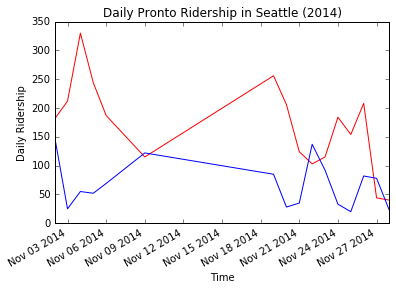

In [14]:
import matplotlib.pyplot as plt

# define the weather types for consideration in the analysis and put them in a dictionary
weatherDict = {'All days (rain and no rain)':0, 'Rainy days only':1,'Non-rainy days only':2}

'''
Function to plot daily ridership over a time period by user type and weather condition for 2014
'''
def plotDailyRidership(annualMember,shortTermPassHolder,weather,startMonth,endMonth):
    # construct the dates
    startDate = '2014' + '-' + str(startMonth)
    endDate = '2014' + '-' + str(endMonth)
    
    # all days case
    if weather==0:
        if annualMember==True:
            #ridershipPlot = tsDailyAnnMemRidership['2014':'2014'].plot(color='r')
            ridershipPlot = tsDailyAnnMemRidership[startDate:endDate].plot(color='r')
            ridershipPlot.set_xlabel('Time')
            ridershipPlot.set_ylabel('Daily Ridership')
            ridershipPlot.set_title('Daily Pronto Ridership in Seattle (2014)')
        if shortTermPassHolder==True:
            ridershipPlot = tsSTPassHolderRidership[startDate:endDate].plot(color='b')
            ridershipPlot.set_xlabel('Time')
            ridershipPlot.set_ylabel('Daily Ridership')
            ridershipPlot.set_title('Daily Pronto Ridership in Seattle (2014)')
    # rainy days case
    elif weather==1:
        if annualMember==True:
            ridershipPlot = tsDailyAnnMemRidershipRain[startDate:endDate].plot(color='r')
            ridershipPlot.set_xlabel('Time')
            ridershipPlot.set_ylabel('Daily Ridership')
            ridershipPlot.set_title('Daily Pronto Ridership in Seattle (2014)')
        if shortTermPassHolder==True:
            ridershipPlot = tsDailySTPassHolderRidershipRain[startDate:endDate].plot(color='b')
            ridershipPlot.set_xlabel('Time')
            ridershipPlot.set_ylabel('Daily Ridership')
            ridershipPlot.set_title('Daily Pronto Ridership in Seattle (2014)')
    # non-rainy days
    else: #2
        if annualMember==True:
            ridershipPlot = tsDailyAnnMemRidershipNoRain[startDate:endDate].plot(color='r')
            ridershipPlot.set_xlabel('Time')
            ridershipPlot.set_ylabel('Daily Ridership')
            ridershipPlot.set_title('Daily Pronto Ridership in Seattle (2014)')
        if shortTermPassHolder==True:
            ridershipPlot = tsDailySTPassHolderRidershipNoRain[startDate:endDate].plot(color='b')
            ridershipPlot.set_xlabel('Time')
            ridershipPlot.set_ylabel('Daily Ridership')
            ridershipPlot.set_title('Daily Pronto Ridership in Seattle (2014)')

interact(plotDailyRidership,annualMember=True,shortTermPassHolder=False,weather=weatherDict,
         startMonth=monthRange2014,endMonth=monthRange2014)
print('If shown, Annual Member daily ridership is presented in RED.')    
print('If shown, Short-Term Pass Holder daily ridership is presented in BLUE.')    


### Daily Ridership Plots by User Type and Weather (2015)

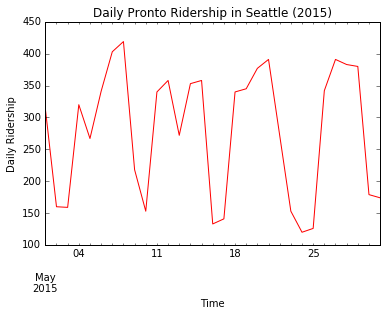

In [15]:
import matplotlib.pyplot as plt

'''
Function to plot daily ridership over a time period by user type and weather condition for 2015
'''
def plotDailyRidership(annualMember,shortTermPassHolder,weather,startMonth,endMonth):
    # construct the dates
    startDate = '2015' + '-' + str(startMonth)
    endDate = '2015' + '-' + str(endMonth)
    
    # all days case
    if weather==0:
        if annualMember==True:
            ridershipPlot = tsDailyAnnMemRidership[startDate:endDate].plot(color='r')
            ridershipPlot.set_xlabel('Time')
            ridershipPlot.set_ylabel('Daily Ridership')
            ridershipPlot.set_title('Daily Pronto Ridership in Seattle (2015)')
        if shortTermPassHolder==True:
            ridershipPlot = tsSTPassHolderRidership[startDate:endDate].plot(color='b')
            ridershipPlot.set_xlabel('Time')
            ridershipPlot.set_ylabel('Daily Ridership')
            ridershipPlot.set_title('Daily Pronto Ridership in Seattle (2015)')
    # rainy days case
    elif weather==1:
        if annualMember==True:
            ridershipPlot = tsDailyAnnMemRidershipRain[startDate:endDate].plot(color='r')
            ridershipPlot.set_xlabel('Time')
            ridershipPlot.set_ylabel('Daily Ridership')
            ridershipPlot.set_title('Daily Pronto Ridership in Seattle (2015)')
        if shortTermPassHolder==True:
            ridershipPlot = tsDailySTPassHolderRidershipRain[startDate:endDate].plot(color='b')
            ridershipPlot.set_xlabel('Time')
            ridershipPlot.set_ylabel('Daily Ridership')
            ridershipPlot.set_title('Daily Pronto Ridership in Seattle (2015)')
    # non-rainy days
    else: #2
        if annualMember==True:
            ridershipPlot = tsDailyAnnMemRidershipNoRain[startDate:endDate].plot(color='r')
            ridershipPlot.set_xlabel('Time')
            ridershipPlot.set_ylabel('Daily Ridership')
            ridershipPlot.set_title('Daily Pronto Ridership in Seattle (2015)')
        if shortTermPassHolder==True:
            ridershipPlot = tsDailySTPassHolderRidershipNoRain[startDate:endDate].plot(color='b')
            ridershipPlot.set_xlabel('Time')
            ridershipPlot.set_ylabel('Daily Ridership')
            ridershipPlot.set_title('Daily Pronto Ridership in Seattle (2015)')

interact(plotDailyRidership,annualMember=True,shortTermPassHolder=False,weather=weatherDict,
         startMonth=monthRange2015,endMonth=monthRange2015)
print('If shown, Annual Member daily ridership is presented in RED.')    
print('If shown, Short-Term Pass Holder daily ridership is presented in BLUE.')    


### Comments on Question 2 Plots
From the above plots, one can see (perhaps not too surprisingly) that more often than not, daily ridership is higher for Annual Members than for Short-Term Pass Holders. That said, when both user types are plotted, one may often observe there are several spikes where Short-Term Pass Holderdaily ridership is higher than Annual Member ridership. It is possible that integration of additional data, such as holiday or special event schedules, and further analyses may be able to shed some light on the occurence of these spikes. Finally, separate plots were made for 2014 and 2015 for the same reasons as aforementioned with respect to Question 1.

## Paragraph Describing Use of Features Discussed in Lecture/Conclusion
In this assignment, I was able to apply material learned from each of the preceding lectures in order to complete it. From early lectures, I used knowledge on general usage of pandas and matplotlib. From the the more recent lectures, however, one of the first topics covered in class that I made use of was magic commands. Specifically, I made use of a line magic command to invoke matplotlib plotting inline. Additionally, although no longer shown in this notebook, I used the %timeit magic command in order to time the reading and loading of one of the larger .csv files (the trips file) and found it took approximately 90s to load. In terms of shell commands, I did not use anything much beyond basics of navigating the file directories (cd), creation of directories for the data and analysis (mkdir), creation of the readme (touch) and subsequent editing in Atom, tab completion of file paths/directories in the terminal, viewing of previously typed commands with the up arrow, submission of the homework to github via the terminal, and installation of the ipywidgets package via conda. In terms of help functionality, the '?' operator was frequently used to view documentation for functions I was less familiar with to view their arguments, return values, and get a general understanding of how they work. The 'shift tab' combination in a function's empty parentheses was also frequently used to view the required arguments. Finally, though not within the ipython notebook itself, various documentation for topics such as 'Series' in pandas, and additional help topics as discussed on stackoverflow were examined online. Keyboard shortcuts played a big role in saving time during the completion of this homework. Notably, when in command mode, the shortcuts used to create and delete cells in the notebook, and change a cell to markdown instead of code were frequently used. Tab complete was frequently used to recall variable names and complete partially-typed function names etc. throughout the coding process. Other ipython features discussed in lecture that were used in this project include the use of the ipywidgets (i.e., sliders, checkboxes, combo boxes etc.) and the use of the interact function.